<a href="https://colab.research.google.com/github/NekoDK/Omgu_DA/blob/OmguDA_6/OmguDA_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

# Загрузка данных из Excel файла
file_path = 'zad6.1.xlsx'
sheet_name = 'Лист2'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Извлечение необходимых значений
average_Y1 = df.iloc[34, 1]  # Среднее значение Y1
sum_Y_minus_T = df.iloc[34, 3]  # Сумма Y-T=S
sum_dy1_cos = df.iloc[34, 8]  # Сумма dy1*cos
sum_dy1_sin = df.iloc[34, 9]  # Сумма dy1*sin
sum_E_squared = df.iloc[34, 12]  # Сумма E^2
sum_Y_minus_Ycp_squared = df.iloc[34, 13]  # Сумма (Y-Ycp)^2
a0 = df.iloc[37, 8]  # Коэффициент a0
a1 = df.iloc[38, 8]  # Коэффициент a1
a2 = df.iloc[39, 8]  # Коэффициент a2
A = df.iloc[36, 13]  # Коэффициент детерминации A

# Вывод результатов
print(f"Среднее значение Y1: {average_Y1}")
print(f"Сумма Y-T=S: {sum_Y_minus_T}")
print(f"Сумма dy1*cos: {sum_dy1_cos}")
print(f"Сумма dy1*sin: {sum_dy1_sin}")
print(f"Сумма E^2: {sum_E_squared}")
print(f"Сумма (Y-Ycp)^2: {sum_Y_minus_Ycp_squared}")
print(f"Коэффициент a0: {a0}")
print(f"Коэффициент a1: {a1}")
print(f"Коэффициент a2: {a2}")
print(f"Коэффициент детерминации A: {A}")

Среднее значение Y1: 2791.718067606108
Сумма Y-T=S: 269.1500957893213
Сумма dy1*cos: 14.288717506451917
Сумма dy1*sin: -125.8013242854657
Сумма E^2: 3354.5300134203308
Сумма (Y-Ycp)^2: 381185.6848581415
Коэффициент a0: 8.682261154494237
Коэффициент a1: 0.9218527423517365
Коэффициент a2: -8.116214470030044
Коэффициент детерминации A: 0.9911997481892093


Среднее Y1: 2791.718067606108
Сумма Y-T=S: 269.1500957893213
Сумма dy1_cos: 14.288717506451974
Сумма dy1_sin: -125.80132428546575
Сумма E^2: 3354.5300134203303
Сумма (Y-Ycp)^2: 381185.6848581415
a0: 8.682261154494237
a1: 0.9218527423517402
a2: -8.116214470030048
Коэффициент детерминации A: 0.9911997481892093


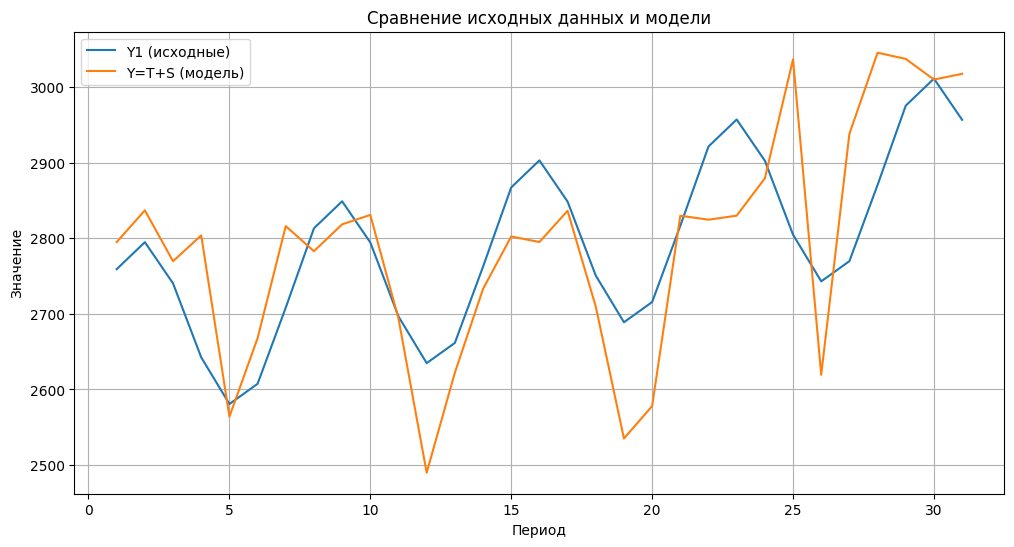

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'zad6.1.xlsx'
sheet_name = 'Лист2'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Исходные данные (строки 4-34 Excel)
df_original = pd.DataFrame({
    'Period': df.iloc[2:34, 0].values,
    'Y1': df.iloc[2:34, 1].values,
    'Y0': df.iloc[2:34, 2].values
}).apply(pd.to_numeric, errors='coerce').dropna()

# Вычисляемые столбцы
n = len(df_original)
df_original['Y-T=S'] = df_original['Y1'] - df_original['Y0']
df_original['Period_Rad'] = 2 * np.pi / 5 * (df_original['Period'] - 1)
df_original['COS'] = np.cos(df_original['Period_Rad'])
df_original['SIN'] = np.sin(df_original['Period_Rad'])
df_original['dy1_cos'] = df_original['Y-T=S'] * df_original['COS']
df_original['dy1_sin'] = df_original['Y-T=S'] * df_original['SIN']

# Коэффициенты гармоники
a0 = df_original['Y-T=S'].sum() / n
a1 = (2 / n) * df_original['dy1_cos'].sum()
a2 = (2 / n) * df_original['dy1_sin'].sum()

# Модель
df_original['S'] = a0 + a1 * df_original['COS'] + a2 * df_original['SIN']
df_original['Y=T+S'] = df_original['S'] + df_original['Y0']
df_original['E^2'] = (df_original['Y=T+S'] - df_original['Y0'])**2
y_mean = df_original['Y1'].mean()
df_original['(Y-Ycp)^2'] = (df_original['Y1'] - y_mean)**2

# Результаты
print("Среднее Y1:", df_original['Y1'].mean())
print("Сумма Y-T=S:", df_original['Y-T=S'].sum())
print("Сумма dy1_cos:", df_original['dy1_cos'].sum())
print("Сумма dy1_sin:", df_original['dy1_sin'].sum())
print("Сумма E^2:", df_original['E^2'].sum())
print("Сумма (Y-Ycp)^2:", df_original['(Y-Ycp)^2'].sum())
print("a0:", a0)
print("a1:", a1)
print("a2:", a2)
print("Коэффициент детерминации A:", 1 - df_original['E^2'].sum() / df_original['(Y-Ycp)^2'].sum())

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(df_original['Period'], df_original['Y1'], label='Y1 (исходные)')
plt.plot(df_original['Period'], df_original['Y=T+S'], label='Y=T+S (модель)')
plt.xlabel('Период')
plt.ylabel('Значение')
plt.title('Сравнение исходных данных и модели')
plt.legend()
plt.grid(True)
plt.show()